# 🎭 How many faces do you see in this painting? Computer vision has the answer!

Face detection is one of the first practical applications in computer vision. But what happens when we apply this technology to works of art?  

## 🔍 How does it work?  
- First, we use **dlib’s face detector**, which relies on HOG (Histogram of Oriented Gradients).  
- If it doesn’t detect enough faces, we use OpenCV’s **Haarcascades detector** as a backup.  

## 💡 Why this approach?  
- **Dlib** is usually more precise in well-lit images without too much distortion.  
- **OpenCV** is faster and can help when dlib doesn’t detect enough faces.  

## 🖼️ Practical example  
We apply these models to an image with multiple people, ensuring we capture most of the faces.  

## ⚙️ Business impact  
- 🎨 Helps analyze the composition of paintings and photographs.  
- 📷 Used in facial recognition and forensic analysis systems.  
- 🤖 A key step in more advanced computer vision projects.  

## 📊 Code summary  
- We load an image of a Botero artwork.  
- Detect faces with dlib; if too few are found, we use OpenCV.  
- Draw detection rectangles.  
- Display the image with the highlighted faces.  

## 💭 Reflection  
Computer vision is everywhere, from art to security. If you want to learn more about AI applied to images, **this is a great first step**. 🚀  

🔑 #ComputerVision #OpenCV #dlib #MachineLearning #Python #AI #ArtificialIntelligence #ComputerVision #ArtAndTechnology  

---

# 🎭 ¿Cuántos rostros ves en esta pintura? ¡La visión por computadora tiene la respuesta!

La detección de rostros es una de las primeras aplicaciones prácticas en visión por computadora. Pero, ¿qué pasa cuando aplicamos esta tecnología a obras de arte?  

## 🔍 ¿Cómo funciona?  
- Primero, usamos el detector de rostros de **dlib**, que se basa en HOG (Histogram of Oriented Gradients).  
- Si no detecta suficientes rostros, recurrimos al detector Haarcascades de **OpenCV** como respaldo.  

## 💡 ¿Por qué este enfoque?  
- **Dlib** suele ser más preciso en imágenes con buena iluminación y sin muchas distorsiones.  
- **OpenCV** es más rápido y puede ayudar cuando dlib no detecta suficientes rostros.  

## 🖼️ Ejemplo práctico  
Aplicamos estos modelos a una imagen con múltiples personas, asegurándonos de capturar la mayoría de los rostros.  

## ⚙️ Impacto en el negocio  
- 🎨 Puede ayudar a analizar la composición de pinturas y fotografías.  
- 📷 Se usa en sistemas de reconocimiento facial y análisis forense.  
- 🤖 Es un paso clave en proyectos más avanzados de visión artificial.  

## 📊 Resumen del código  
- Cargamos una imagen de una obra de Botero.  
- Detectamos rostros con dlib; si hay pocos, usamos OpenCV.  
- Dibujamos los rectángulos de detección.  
- Mostramos la imagen con los rostros resaltados.  

## 💭 Reflexión  
La visión por computadora está en todas partes, desde el arte hasta la seguridad. Si quieres aprender más sobre inteligencia artificial aplicada a imágenes, **este es un gran primer paso**. 🚀  

🔑 #ComputerVision #OpenCV #dlib #MachineLearning #Python #AI #ArtificialIntelligence #VisionArtificial #ArteYTecnología  


Faces detected: 4


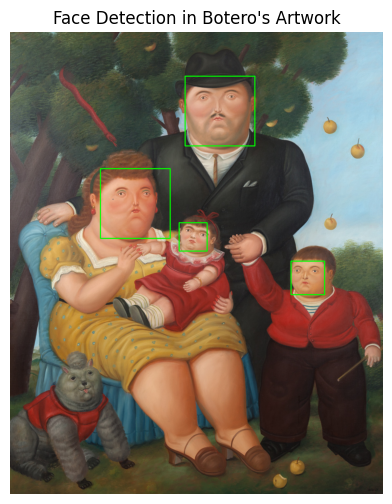

In [55]:
# Import necessary libraries
import cv2  # OpenCV for image processing
import dlib  # dlib for face detection
import matplotlib.pyplot as plt  # Matplotlib for displaying images

# Load the image
image_path = "Botero_Family.jpg"  # Ensure the file name and path are correct
image = cv2.imread(image_path)  # Read the image using OpenCV

# Check if the image was successfully loaded
if image is None:
    print("Error: Could not load the image.")
else:
    # Convert the image to grayscale for better face detection performance
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load dlib's frontal face detector
    detector = dlib.get_frontal_face_detector()

    # Detect faces using dlib
    # The second parameter (1) adjusts the upsampling level to detect smaller faces
    faces = detector(gray, 1)  

    # If dlib detects fewer than 3 faces, use OpenCV's Haarcascade as an alternative
    if len(faces) < 3:  # Assuming there should be at least 3 faces in the image
        print("Few faces detected with dlib, trying OpenCV Haarcascade...")
        
        # Load OpenCV's pre-trained Haarcascade face detector
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        
        # Detect faces using OpenCV's Haarcascade
        faces_opencv = face_cascade.detectMultiScale(
            gray, scaleFactor=1.05, minNeighbors=2, minSize=(15, 15)
        )

        # Draw rectangles around detected faces from OpenCV
        for (x, y, w, h) in faces_opencv:
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue rectangle
    else:
        # Draw rectangles around detected faces from dlib
        for face in faces:
            x, y, w, h = face.left(), face.top(), face.width(), face.height()
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle

    # Print the number of detected faces
    print(f"Faces detected: {len(faces)}")

    # Display the image with detected faces
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.axis("off")  # Hide axis
    plt.title("Face Detection in Botero's Artwork")
    plt.show()
